In [ ]:
# !pip3 install -q rank_bm25

In [21]:
from densePhrases.scripts.sampler import QAWikiDumpSampler

### params

In [22]:
opennq_path = 'train_preprocessed.json'
wiki_dev_path = 'dev_wiki'
wiki_full_path = '/data/dph-data/wikidump/20181220_concat'
wiki_cache = 'wiki_cache'
pwd = '/root/notebooks/scratchpad'
wiki_dump_path_csv = f'{wiki_cache}/wiki_dump.csv'

### get question / answers

In [23]:
%%time
sampler_dev = QAWikiDumpSampler(
    path_qa=opennq_path,
    path_wiki=wiki_dev_path,
    path_cache='wiki_cache_dev',
)

CPU times: user 10.9 s, sys: 661 ms, total: 11.5 s
Wall time: 11.5 s


In [24]:
df_nq = sampler_dev.df_qa

In [25]:
len(df_nq)

79168

In [26]:
df_nq.answer_cnt.sum()

96676

In [27]:
df_nq.sample(n=10, random_state=0)

,id,question,answer_cnt,answers
937,train_937,what side of the road to they drive on in aust...,1,[on the left]
46520,train_46520,who wrote the song when we by tank,3,"[Carl McCormick, Johnnie Newt, Durrell Babbs]"
65747,train_65747,when does the new series of ex on the beach st...,1,[20 March 2018]
17428,train_17428,who played uncle arthur in the comedy company,1,[Glenn Robbins]
32582,train_32582,where do chicken wings and drumettes come from,1,[chicken wing section]
64736,train_64736,where is pepsin most active in the body,1,[stomach]
50023,train_50023,surname of woman who owns pie shop in sweeny todd,1,[Lovett]
54540,train_54540,who is the actress who plays alex on big bang ...,1,[Margo Cathleen Harshman]
16277,train_16277,where is white matter located in spinal cord,1,[superficial parts]
16202,train_16202,who sings the theme song for touched by an angel,1,[Della Reese]


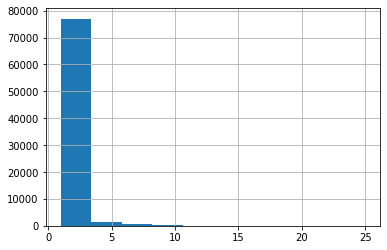

In [28]:
_ = df_nq.answer_cnt.hist()

### wiki dump

In [29]:
df_wiki_dev = sampler_dev.df_wiki

In [30]:
df_wiki_dev.paragraph_cnt.describe()

count    129730.000000
mean         42.838973
std          33.365861
min           1.000000
25%          18.000000
50%          35.000000
75%          58.000000
max         206.000000
Name: paragraph_cnt, dtype: float64

In [31]:
df_wiki_dev.sample(3, random_state=0)

,file,file_idx,article_idx,paragraph_idx,title,paragraph_cnt,paragraph,paragraph_char_cnt
44091,dev_wiki/0002,2,417,23,Dutch language,69,Limburgish has the status of official regiona...,711
1665,dev_wiki/0000,0,84,21,History of construction,47,Vitruvius gives details of many Roman machine...,1052
65279,dev_wiki/0003,3,582,23,Continent,28,Some argue that continents are accretionary c...,649


In [32]:
df_wiki_dev.title.value_counts()

List of Madagascar (franchise) characters                         206
Economic history of the United States                             195
List of Kung Fu Panda characters                                  190
Reconstruction Era                                                188
Iran–Iraq War                                                     175
                                                                 ... 
Even the Man in the Moon Is Cryin'                                  1
List of airports in Antigua and Barbuda                             1
List of flag bearers for Canada at the Olympics                     1
List of European Cup and UEFA Champions League winning players      1
Sharon Warren                                                       1
Name: title, Length: 7136, dtype: int64

In [33]:
sampler_dev.query('kung fu', top_n=5)

,file,file_idx,article_idx,paragraph_idx,title,paragraph_cnt,paragraph,paragraph_char_cnt
0,dev_wiki/0000,0,93,59,List of Kung Fu Panda characters,190,Master Sheep is a Kung Fu Master who was amon...,629
1,dev_wiki/0001,1,166,10,The Karate Kid (2010 film),18,"Despite maintaining the original title, the 2...",612
2,dev_wiki/0000,0,93,51,List of Kung Fu Panda characters,190,"Master Boar later appeared in """" as a playabl...",698
3,dev_wiki/0000,0,93,54,List of Kung Fu Panda characters,190,Master Leopard is a Kung Fu Master who is bri...,596
4,dev_wiki/0000,0,93,68,List of Kung Fu Panda characters,190,"Master Kweng (Chinese for ""Kaunda"") is a Kung...",953


In [34]:
sampler_dev.query('kung fu', top_n=3, return_df=False)

{Paragraph(article=Article(file='dev_wiki/0000', file_idx=0, article_idx=93), paragraph_idx=51),
 Paragraph(article=Article(file='dev_wiki/0000', file_idx=0, article_idx=93), paragraph_idx=59),
 Paragraph(article=Article(file='dev_wiki/0001', file_idx=1, article_idx=166), paragraph_idx=10)}

In [35]:
res = sampler_dev.process_queries(10, n_jobs=-1)

In [36]:
res.paragraph_cnt

1986

In [37]:
res.article_cnt

1222

### full wikipedia dump

In [ ]:
%%time
sampler = QAWikiDumpSampler(
    path_qa=opennq_path,
    path_wiki=wiki_full_path,
    path_cache='wiki_cache',
    clear_cache=True,
)